In [44]:
from shapely.geometry import Polygon
import numpy as np
import geopandas as gpd

In [62]:
def is_clockwise_three_points(points):
    """Determine if a polygon (defined by its points) is clockwise or counterclockwise
    by using the first three points."""
    if len(points) < 3:
        raise ValueError("Polygon must have at least 3 points")

    p1, p2, p3 = points[:3]
    print((p2[0] - p1[0]) * (p3[1] - p1[1]))
    print((p2[1] - p1[1]) * (p3[0] - p1[0]))
    return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0]) < 0

In [63]:
a = Polygon([[0,0], [1.5,0], [1,1], [0,1], [0,0]])
b = Polygon([[2,2], [2,3], [3,3], [3,2], [2,2]])
poly = [a,b]

In [64]:
gdf = gpd.GeoDataFrame(geometry=poly)

In [65]:
print(gdf['geometry'][0])
counterclockwise_poly = []
is_clockwise = []
for polygon in gdf['geometry']:
    points = list(polygon.exterior.coords)
    print(points)
    if is_clockwise_three_points(points):
        print('T')
        polygon = Polygon(points[::-1])
    counterclockwise_poly.append(polygon)
    is_clockwise.append(is_clockwise_three_points(points))
gdf = gpd.GeoDataFrame({'is_clock': is_clockwise}, geometry=counterclockwise_poly)

POLYGON ((0 0, 1.5 0, 1 1, 0 1, 0 0))
[(0.0, 0.0), (1.5, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0)]
1.5
0.0
1.5
0.0
[(2.0, 2.0), (2.0, 3.0), (3.0, 3.0), (3.0, 2.0), (2.0, 2.0)]
0.0
1.0
T
0.0
1.0


<Axes: >

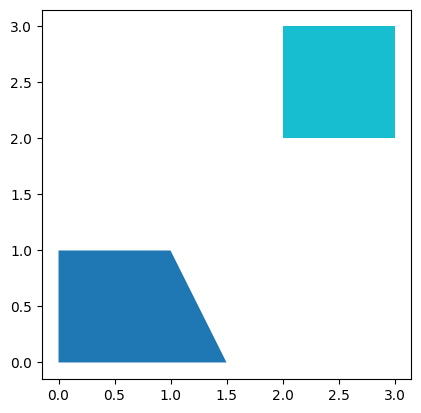

In [66]:
gdf.plot(column='is_clock')

In [54]:
for polygon in gdf['geometry']:
    points = list(polygon.exterior.coords)
    print(points)

    if is_clockwise_three_points(points):
        print('T')

[(0.0, 0.0), (1.5, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0)]
[(2.0, 2.0), (3.0, 2.0), (3.0, 3.0), (2.0, 3.0), (2.0, 2.0)]


<Axes: >

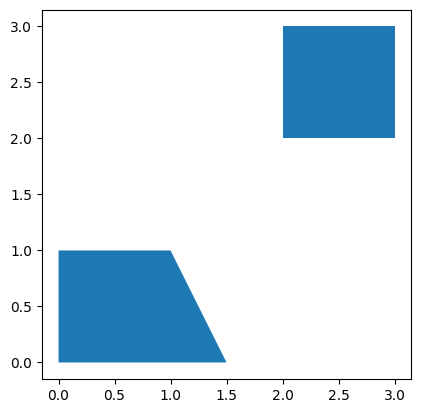

In [50]:
gdf.plot()